<a href="https://colab.research.google.com/github/vn322/Cod_future/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

Кластеризация на основе центра масс данных (centroid-based).

Это один из популярных алгоритмов кластеризации. Его задача — нахождение k центров и определение их линейной разделимости. Граница кластера всегда будет идти по прямой или плоскости. Главный параметр алгоритма — число кластеров k. Есть много рекомендаций по его настройке.

Метод kNN относится к разряду ленивых классификаторов. Это указывает на то, что ммодель  "обучается" только на новых данных, не учитывая предыдущий опыт. В данном же случае это означает, что в процессе обучения алгоритм не делает ничего, а только сохраняет размеченные тренировочные данные. Сам процесс классификации начинается только тогда, когда появляются новые немаркированные данные - алгоритм по каким-то признакам считает расстояния между уже размеченными и еще неизвестными объектами в пространстве. 

Алгоритм kNN состоит из трех последовательных этапов:

1) вычислить расстояние от целевого объекта (который необходимо классифицировать) до каждого из объектов обучающей выборки (уже маркированных каким-либо классом);

2) отобрать k объектов обучающей выборки, расстояния до которых минимальны (на первом этапе k выбирается произвольно, затем итеративно подбирается лучшее значение k на основе точности полученных прогнозов при каждом из выбранных k );

3) получить класс объекта на основе наиболее часто встречающегося среди k ближайших соседей (это может быть число или название класса в зависимости от того, как изначально были обозначены классы)

По умолчанию алгоритм использует метрику Минковского, которая в случае степени p = 2 обращается во всем известную из школьной геометрии Евклидову метрику - расстояние между двумя точками в пространстве:

$$dist = \sqrt{(x_1-y_1)^2 + (x_2 - y_2)^2 + \ldots + (x_n - y_n)^2}$$


# Подготовка данных

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
lol = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
lol.head(3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [56]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [122]:
lol.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [163]:
df1 = lol.copy() # произведём копирование датасета для защиты от случайного изменения

In [164]:
df1.drop('gameId', axis=1, inplace=True)
df1.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [165]:
# произведём резервное копирование очищенного датасета
df_kmeans = df1.copy()

In [166]:
df_kmeans

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


# Простая реализация

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_kmeans = scaler.fit_transform(df_kmeans)

In [169]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=4)
clusters = kmeans_model.fit_predict(df_kmeans)
df_kmeans.insert(df_kmeans.columns.get_loc("blueWins"), "Cluster", clusters)
df_kmeans.head(3)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,3,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,2,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,1,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [170]:
kmeans_model.cluster_centers_

array([[ 8.86111111e-01,  2.25312500e+01,  2.95347222e+00,
         7.60416667e-01,  9.79236111e+00,  3.75972222e+00,
         1.04493056e+01,  8.21527778e-01,  5.27083333e-01,
         2.94444444e-01,  2.02777778e-01,  1.86695979e+04,
         7.22597222e+00,  1.93156681e+04,  2.29751389e+02,
         5.29659722e+01,  3.81864931e+03,  2.86405069e+03,
         2.29751389e+01,  1.86695979e+03,  2.18354167e+01,
         2.26111111e+00,  2.39583333e-01,  3.75972222e+00,
         9.79236111e+00,  4.03472222e+00,  2.97222222e-01,
         2.27083333e-01,  7.01388889e-02,  2.77777778e-03,
         1.48509486e+04,  6.57180556e+00,  1.64516174e+04,
         1.98749306e+02,  4.74701389e+01, -3.81864931e+03,
        -2.86405069e+03,  1.98749306e+01,  1.48509486e+03],
       [ 3.56509299e-01,  2.24286123e+01,  2.68640916e+00,
         4.16881259e-01,  5.07725322e+00,  6.64062947e+00,
         5.42947067e+00,  4.70386266e-01,  3.15879828e-01,
         1.54506438e-01,  1.48783977e-02,  1.58786658e+

<AxesSubplot:xlabel='blueKills', ylabel='blueDeaths'>

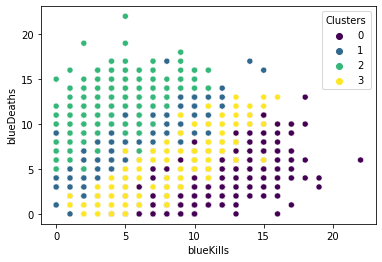

In [171]:
df_kmeans['Clusters'] = kmeans_model.labels_
sns.scatterplot(x="blueKills", y="blueDeaths",hue = 'Clusters',  data=df_kmeans, palette='viridis')

# Выбор количества кластеров

При кластеризации методом k-средних количество кластеров чаще всего оценивают с помощью «метода локтя». Он подразумевает многократное циклическое исполнение алгоритма с увеличением количества выбираемых кластеров, а также последующим откладыванием на графике оценки кластеризации, вычисленного как функция от количества кластеров.

Оценка является мерой входных данных по целевой функции k-средних, то есть некой формой отношения внутрикластерного расстояния к межкластерному расстоянию.

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

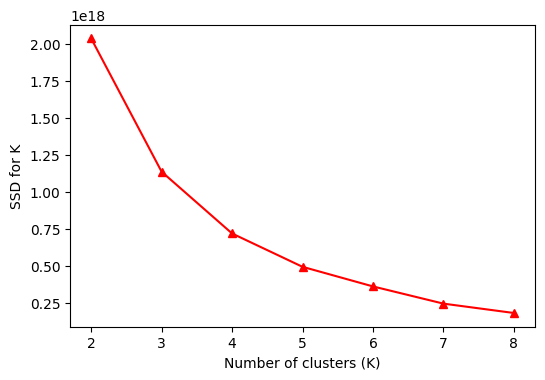

In [64]:
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_kmeans)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="r", marker="^")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

In [68]:
X=df1

In [73]:
y=lol['blueWins']

Попутно изучим ещё один инструмент нормализации данных - MinMaxScaler.
Входные переменные – предикторы могут иметь разные единицы измерения (например, килограммы, километры и часы), что, в свою очередь означает разные масштабы. А это увеличивает сложность моделирования. Большие входные значения (например, разброс в сотни или тысячи единиц) могут привести к модели, которая изучает большие значения веса. Модель с большими значениями веса часто нестабильна, а это означает, что она может страдать от низкой производительности во время обучения и чувствительности к входным значениям, что приводит к более высокой ошибке обобщения.

Нормализация требует, чтобы вы знали или могли точно оценить минимальные и максимальные наблюдаемые значения. Возможно, вы сможете оценить эти значения по имеющимся у вас данным.

$$x_{i,norm} = \frac{x_i - x_{min}}{x_{max} - x_{min}}$$ где

$x_{i,norm}\space{–}\space{нормализованный}\space{элемент}\space{признака,}$ 

$x_{min}\space{–}\space{наименьший}\space{элемент}\space{признака,}$ 

$x_i\space{–}\space{i-й}\space{непреобразованный}\space{элемент,}$

$x_i\space{–}\space{i-й}\space{непреобразованный}\space{элемент,}$

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled=scaler.fit_transform(X)

Теперь же рассмотрим комплекс метрик помогающих оценить работу модели. 

- Коэффициент «силуэт» вычисляется с помощью среднего внутрикластерного расстояния  и среднего расстояния до ближайшего кластера  по каждому экземпляру. 
Можно вычислить среднее значение силуэта по всем экземплярам и использовать его как метрику для оценки количества кластеров.
- Davies-Bouldin index Показывает среднее «сходство» кластеров: расстояние между ними сравнивается с их размером. Чем меньше значение, тем лучше произведено разделение на кластеры.
- V-мера представляет собой гармоническое среднее значение  homogeneity_score и completeness_score.  

In [70]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

In [100]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
n= []

for i in range(2,12):
    n.append(i)
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)

dat = {'Кол-во кластеров': n, 'score': km_scores,  
       'silhouette': km_silhouette, 'davies_bouldin':db_score,'vmeasure_score':vmeasure_score}
pd.DataFrame(dat)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

,Кол-во кластеров,score,silhouette,davies_bouldin,vmeasure_score
0,2,15218.764250,0.253960,1.655842,0.029570
1,3,12902.998498,0.235606,1.556535,0.041432
2,4,10908.451703,0.254870,1.532821,0.045232
3,5,10092.589032,0.251101,1.615479,0.214135
4,6,9377.503177,0.244205,1.682908,0.085395
5,7,8732.388385,0.252837,1.532742,0.276887
6,8,8201.754114,0.260586,1.544362,0.124048
7,9,7722.908532,0.260408,1.436445,0.236191
8,10,7358.840235,0.269213,1.428620,0.197168
9,11,6871.691695,0.284804,1.403218,0.177465


In [107]:
from sklearn.mixture import GaussianMixture

gm_bic= []
gm_score=[]
for i in range(2,12):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: -2050189.8299613635
Log-likelihood score for number of cluster(s) 2: 104.52807090653432
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -2122688.7726537185
Log-likelihood score for number of cluster(s) 3: 108.57916106143927
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -2180023.4622130836
Log-likelihood score for number of cluster(s) 4: 111.86275181696216
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -2215140.334571667
Log-likelihood score for number of cluster(s) 5: 114.02184529539318
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -2254170.5632947143
Log-likelihood score for number of cluster(s) 6: 116.379003171256

In [110]:
km.cluster_centers_

array([[ 2.18354430e-01,  6.52221648e-02,  9.75738397e-02,
         3.66373598e-15,  1.99870541e-01,  3.45368239e-01,
         1.63629419e-01, -1.66533454e-16,  1.38777878e-15,
        -1.94289029e-16,  3.16455696e-03,  3.65733345e-01,
         6.32446016e-01,  5.86784960e-01,  6.23975208e-01,
         5.20449229e-01,  3.91537957e-01,  4.44808809e-01,
         6.23975208e-01,  3.65733345e-01,  6.59341303e-02,
         1.14055907e-01,  1.00000000e+00,  3.45368239e-01,
         1.99870541e-01,  2.84358047e-01,  8.82120253e-01,
         7.64240506e-01,  1.00000000e+00,  9.73101266e-02,
         5.52240050e-01,  6.72282204e-01,  6.96093686e-01,
         6.52376895e-01,  5.72317319e-01,  6.08462043e-01,
         5.55191191e-01,  6.52376895e-01,  5.52240050e-01],
       [ 6.92026780e-01,  7.26297092e-02,  1.09983995e-01,
         1.00000000e+00,  3.37409395e-01,  2.27411055e-01,
         2.84991710e-01,  5.00000000e-01,  1.00000000e+00,
         2.91433544e-15,  1.35423007e-02,  4.94641190e-

In [157]:
df_kmeans = df1.copy()

In [158]:
km = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
km.labels_

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

In [154]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df_kmeans)
df_kmeans.insert(df_kmeans.columns.get_loc("blueWins"), "Cluster", clusters)
df_kmeans.head(3)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,gameId,Cluster,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,0,28,2,1,9,6,11,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,0,12,1,0,5,5,5,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,0,15,0,0,7,11,4,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


<AxesSubplot:xlabel='blueKills', ylabel='blueDeaths'>

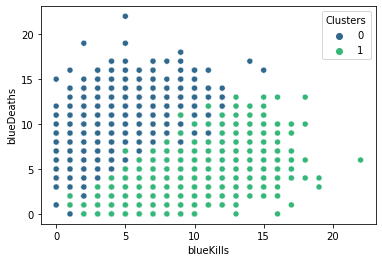

In [161]:
df_kmeans['Clusters'] = km.labels_
sns.scatterplot(x="blueKills", y="blueDeaths",hue = 'Clusters',  data=df_kmeans, palette='viridis')

# Другие методы оценки производительности

Оценка производительности модели не так проста, как подсчет количества ошибок или точности и отзыва контролируемого алгоритма классификации. В частности, любая метрика оценки должна учитывать не абсолютные значения меток кластера, а, скорее, если эта кластеризация определяет разделения данных, аналогичные некоторому основному набору истинных классов или удовлетворяющему некоторому предположению, так что члены, принадлежащие к одному классу, более похожи чем члены разных классов в соответствии с некоторой метрикой сходства.

Индекс Rand 

In [173]:
from sklearn import metrics
labels_true = df_kmeans['blueWins']
labels_pred = df_kmeans['Clusters']
metrics.rand_score(labels_true, labels_pred)

0.5522638667705108

Оценки на основе взаимной информации

In [175]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.13897107002174772

Оценки однородности и полноты

In [176]:
metrics.homogeneity_score(labels_true, labels_pred)

0.2012441334940484

In [177]:
metrics.completeness_score(labels_true, labels_pred)

0.10628231226380584

Индекс Фаулкса-Мэллоуса

In [178]:
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.44714700009952096

Выбор оценки для оценки кластеризации процесс не простой и требует хорошего понимания желательного для задачи и данных способа кластеризации.

# Задание
на собранном ранее наборе данных (он может быть дополнен или собран новый)

- определить цель исследования
- разделить набор данных на тренировочный и тестовый 
- произвести кластерный анализ данных
- описать ход исследования дав пояснение и обоснование
- сделать выводы и определить практическое значение полученных знаний